In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

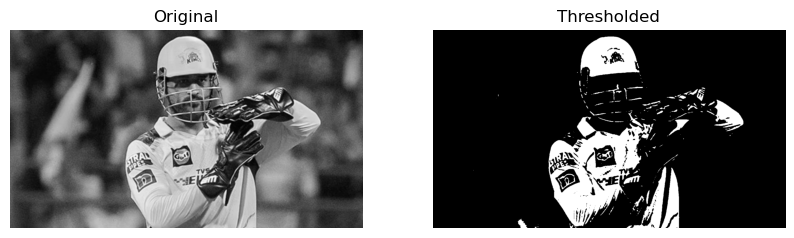

In [2]:
# Load image in grayscale
g_image = cv2.imread("C:\\Users\\student\\Downloads\\msd7.jpg", cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
_, thresh = cv2.threshold(g_image, 185, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(g_image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')
plt.axis('off')
plt.show()

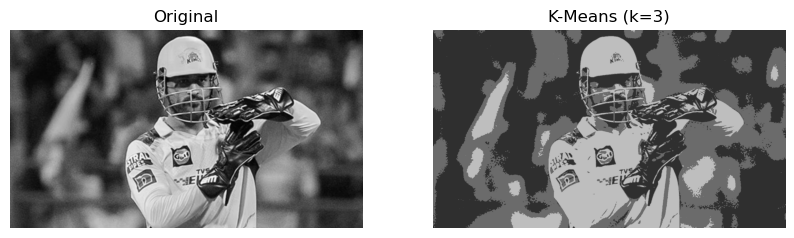

In [5]:
image = cv2.cvtColor(g_image, cv2.COLOR_BGR2RGB)

# Reshape image to a list of pixels
pixels = image.reshape((-1, 3)).astype(np.float32)

# Apply K-Means
k = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to image
centers = np.uint8(centers)
segmented = centers[labels.flatten()].reshape(image.shape)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title(f'K-Means (k={k})')
plt.axis('off')
plt.show()

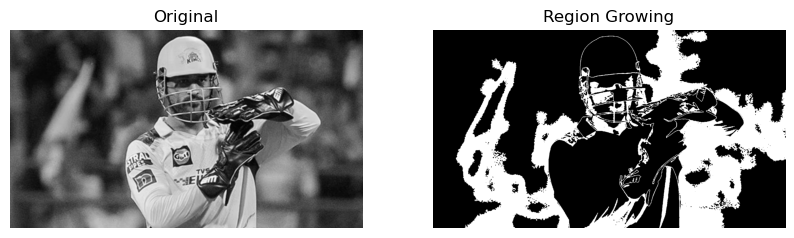

In [7]:
h, w = g_image.shape

# Define seed point (manually chosen, e.g., center)
seed = (h//2, w//2)
threshold = 45  # Similarity threshold

# Create mask and queue for region growing
mask = np.zeros_like(g_image, dtype=np.uint8)
queue = [seed]

# Region growing function
def grow_region(img, mask, queue, thresh):
    while queue:
        x, y = queue.pop(0)
        if mask[x, y] == 0:  # Not visited
            if abs(int(img[x, y]) - int(img[seed])) < thresh:
                mask[x, y] = 255  # Mark as segmented
                # Add neighbors
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w:
                        queue.append((nx, ny))
    return mask

# Apply region growing
segmented = grow_region(g_image, mask, queue, threshold)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(g_image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Region Growing')
plt.axis('off')
plt.show()

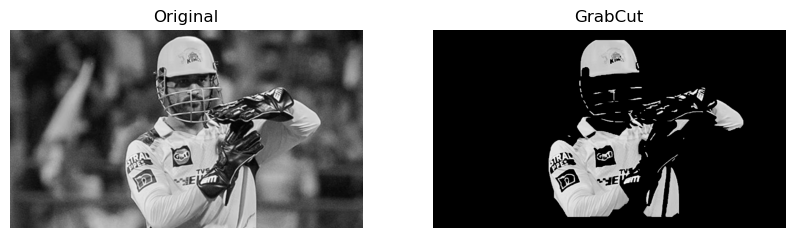

In [9]:
# Initialize mask, background, and foreground models
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define rectangle (x, y, width, height) for initial foreground guess
rect = (50, 50, image.shape[1]-100, image.shape[0]-100)

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create binary mask: 0,2 (background) -> 0; 1,3 (foreground) -> 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented = image * mask2[:, :, np.newaxis]

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title('GrabCut')
plt.axis('off')
plt.show()

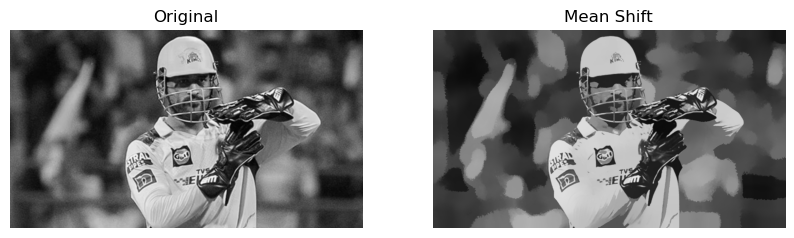

In [11]:
# Apply Mean Shift segmentation
meanshift_seg = cv2.pyrMeanShiftFiltering(image, sp=40, sr=40, maxLevel=1)
meanshift_seg_rgb = cv2.cvtColor(meanshift_seg, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original') 
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(meanshift_seg_rgb)
plt.title('Mean Shift')
plt.axis('off')
plt.show()